In [2]:
import numpy as np
import pandas as pd
import os
from fitness import get_fitness

In [144]:
continuous_data  = '../data/routes_short_2023-06-09|17:27:05/'
discrete_data = '../data/routes_short_2023-05-29|15:33:07/'
data_label = ['Continuous Fitness', '0/1 Fitness'] 

select_criterions = ["RouteCompletionTest", 
                     "CollisionTest", 
                     "OutsideRouteLanesTest", 
                     "Timeout"]

continuous_fitness = get_fitness(continuous_data)[select_criterions][50:]
discrete_fitness = get_fitness(discrete_data)[select_criterions][50:]
print(continuous_fitness.shape)
print(discrete_fitness.shape)

(340, 4)
(340, 4)


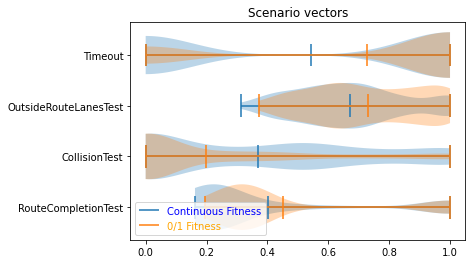

In [145]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10,10))
vl1 = plt.violinplot(continuous_fitness, vert=False, showmeans=True, widths=0.9)
vl2 = plt.violinplot(discrete_fitness, vert=False, showmeans=True, widths=0.9)
plt.yticks(range(1, 5), select_criterions)
plt.title("Scenario vectors")
plt.legend(handles=(vl1['cbars'],vl2['cbars']), 
           labels=[data_label[0],data_label[1]],
           labelcolor=['blue','orange'],
           loc=3)

plt.show()

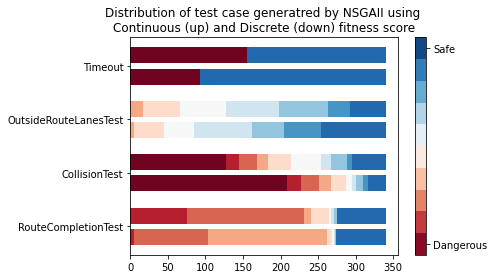

In [146]:
import matplotlib as mpl
cmap = mpl.cm.RdBu
colors = cmap(range(3,253,25))

stack_hist_continuous = np.concatenate([
    [np.histogram(continuous_fitness['RouteCompletionTest'],   range=(0,1), bins=10)[0]],
    [np.histogram(continuous_fitness['CollisionTest'],         range=(0,1), bins=10)[0]],
    [np.histogram(continuous_fitness['OutsideRouteLanesTest'], range=(0,1), bins=10)[0]],
    [np.histogram(continuous_fitness['Timeout'],               range=(0,1), bins=10)[0]],
])

left = np.zeros(4)
for i in range(10):
    plt.barh(y = np.arange(4)+0.2, width = stack_hist_continuous[:,i], left=left, color = colors[i], height=0.3)
    left += stack_hist_continuous[:,i]


stack_hist_discrete = np.concatenate([
    [np.histogram(discrete_fitness['RouteCompletionTest'],   range=(0,1), bins=10)[0]],
    [np.histogram(discrete_fitness['CollisionTest'],         range=(0,1), bins=10)[0]],
    [np.histogram(discrete_fitness['OutsideRouteLanesTest'], range=(0,1), bins=10)[0]],
    [np.histogram(discrete_fitness['Timeout'],               range=(0,1), bins=10)[0]],
])

left = np.zeros(4)
for i in range(10):
    plt.barh(y = np.arange(4)-0.2, width = stack_hist_discrete[:,i], left=left, color = colors[i], height=0.3)
    left += stack_hist_discrete[:,i]

plt.yticks(range(4), select_criterions)
cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmap), ticklocation='right',values=range(10), ticks=[0, 9])
cbar.ax.set_yticklabels(['Dangerous', 'Safe'])  # vertically oriented colorbar

plt.title('Distribution of test case generatred by NSGAII using \nContinuous (up) and Discrete (down) fitness score')
plt.show()

In [213]:
def denoise(data, label):
    data = data.reshape([34,10])
    median = np.percentile(data, 50, axis=1)

    iqr = np.percentile(data, 75, axis=1)-np.percentile(data, 25, axis=1)
    lower = np.percentile(data, 25, axis=1) - 1.5*(iqr)
    upper = np.percentile(data, 75, axis=1) + 1.5*(iqr)
    lower[lower<0] = 0
    upper[upper>1] = 1

    # lower = np.percentile(data, 25, axis=1)
    # upper = np.percentile(data, 75, axis=1)

    plt.plot(range(34), median, label=label)
    plt.fill_between(range(34), lower, upper, alpha=0.2)

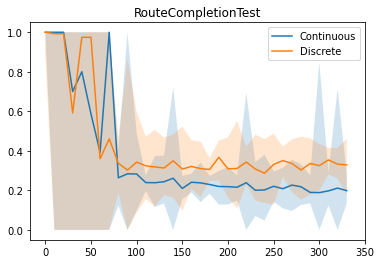

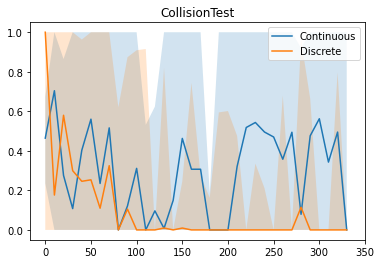

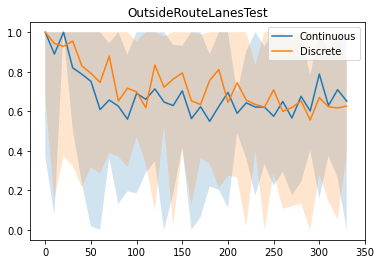

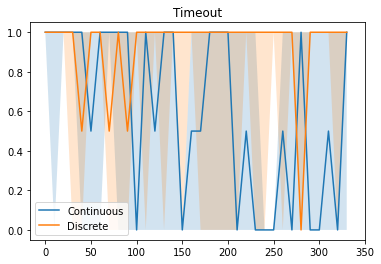

In [214]:

select_criterions = ["RouteCompletionTest", 
                     "CollisionTest", 
                     "OutsideRouteLanesTest", 
                     "Timeout"]

for criterion in select_criterions:
    denoise(continuous_fitness[criterion].to_numpy(), label='Continuous')
    denoise(discrete_fitness[criterion].to_numpy(), label='Discrete')
    plt.xticks(range(0,40,5), range(0,400,50))
    plt.legend()
    plt.title(criterion)
    plt.show()

In [1]:
import numpy as np


In [4]:
np.random.rand(200,14).shape

(200, 14)